# Search runs

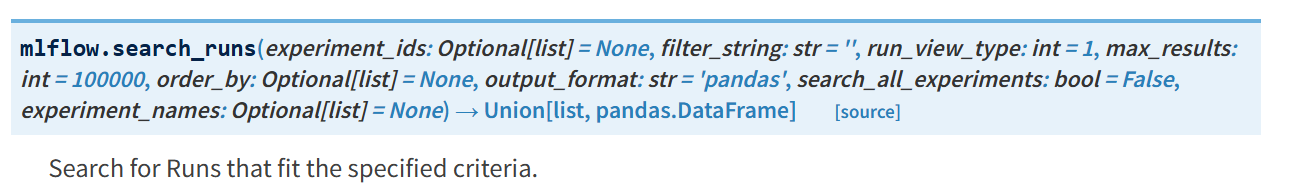

In [ ]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [ ]:
import random
from typing import Dict 
from mlflow_for_ml_dev.src.utils.run_batch import create_runs_batch

## Generating Demo Runs

In [ ]:
experiments = mlflow.search_experiments(view_type=mlflow.tracking.client.ViewType.ACTIVE_ONLY,
                                        max_results=3)

for experiment in experiments:
    create_runs_batch(experiment_id=experiment.experiment_id,n_runs=random.randint(1,5))

In [ ]:
experiment_name = experiments[0].name
print(f"Experiment name: {experiment_name}")
runs = mlflow.search_runs(experiment_names=[experiment_name])

In [ ]:
runs.head()

`output_format`: The output format to be returned. If pandas, a pandas.DataFrame is returned and, if list, a list of mlflow.entities.Run is returned.

## Using filter strings

In order to filter your MLflow runs, you will need to write search queries, which are pseudo-SQL conditions expressed in a distinct syntax.

In [ ]:
runs = mlflow.search_runs(experiment_names=[experiment_name], filter_string="tags.project_type = 'development'")

In [ ]:
runs.head()

In [ ]:
runs[["metrics.metric_1","metrics.metric_2","params.param_1","params.param_2","tags.algorithm_type"]]

In [ ]:
runs = mlflow.search_runs(experiment_names=[experiment_name], filter_string="tags.project_type = 'development' AND metrics.metric_1 > 0.8")

In [ ]:
runs[["metrics.metric_1","metrics.metric_2","params.param_1","params.param_2","tags.algorithm_type"]]

## Returning Run Objects

To return Run objects we have to specify this using the parameter `output_format`

**output_format** – The output format to be returned. If pandas, a pandas.DataFrame is returned and, if list, a list of mlflow.entities.Run is returned.

In [ ]:
runs = mlflow.search_runs(experiment_names=[experiment_name], filter_string="tags.project_type = 'development'", output_format="list")

In [ ]:
for run in runs:
    print(type(run))
    print(f"Name: {run.info.run_name}, ID: {run.info.run_id}, Metrics: {run.data.metrics}")
    print("\n")